In [ ]:
#randomized me2b
# Note :- The optimization will take very long, that's why this code does only 50 interations for now. Complete optimization will give the correct binding energies.

In [1]:
import numpy as np
from itertools import combinations

filename = 'sps.dat'

with open(filename, 'r') as file:
    for line in file:
        print(line.strip())

1   0   0   0.5  -0.5  -0.5
2   0   0   0.5   0.5  -0.5
3   0   0   0.5  -0.5   0.5
4   0   0   0.5   0.5   0.5
5   0   1   1.5  -1.5  -0.5
6   0   1   1.5  -0.5  -0.5
7   0   1   1.5   0.5  -0.5
8   0   1   1.5   1.5  -0.5
9   0   1   1.5  -1.5   0.5
10   0   1   1.5  -0.5   0.5
11   0   1   1.5   0.5   0.5
12   0   1   1.5   1.5   0.5
13   0   1   0.5  -0.5  -0.5
14   0   1   0.5   0.5  -0.5
15   0   1   0.5  -0.5   0.5
16   0   1   0.5   0.5   0.5


In [2]:
n_val = []
l_val = []
states = []
orbitals=0
A=16
with open(filename, 'r') as qnum:
    for line in qnum:
        if line.strip().startswith("#") or not line.strip():
            continue
        nums = line.split()
        n = int(nums[1])
        l = int(nums[2])
        j = float(nums[3])
        mj = float(nums[4])
        tz = float(nums[5])

        n_val.append(n)
        l_val.append(l)
        orbitals+=1
        
        states.append((n, l, j, mj, tz))

indexed_states = {index: state for index, state in enumerate(states)}

# Output the indexed states
for index, state in indexed_states.items():
    print(f"{index} : {state}")

0 : (0, 0, 0.5, -0.5, -0.5)
1 : (0, 0, 0.5, 0.5, -0.5)
2 : (0, 0, 0.5, -0.5, 0.5)
3 : (0, 0, 0.5, 0.5, 0.5)
4 : (0, 1, 1.5, -1.5, -0.5)
5 : (0, 1, 1.5, -0.5, -0.5)
6 : (0, 1, 1.5, 0.5, -0.5)
7 : (0, 1, 1.5, 1.5, -0.5)
8 : (0, 1, 1.5, -1.5, 0.5)
9 : (0, 1, 1.5, -0.5, 0.5)
10 : (0, 1, 1.5, 0.5, 0.5)
11 : (0, 1, 1.5, 1.5, 0.5)
12 : (0, 1, 0.5, -0.5, -0.5)
13 : (0, 1, 0.5, 0.5, -0.5)
14 : (0, 1, 0.5, -0.5, 0.5)
15 : (0, 1, 0.5, 0.5, 0.5)


In [3]:
#checking allowed  couple states
# Checking parity
def parity(l1, l2):
    return (-1)**(l1 + l2)

# Function to check if two single-particle states form a valid two-body state
def allowed_pair(state1, state2, isospin_conservation=False):
    
    _, l1, j1, mj1, tz1 = state1
    _, l2, j2, mj2, tz2 = state2

    # Ensure parity is positive
    if parity(l1, l2) != 1:
        return False

    # Ensure total angular momentum J=0
    if j1 != j2 or mj1 + mj2 != 0:
        return False
    
    # If isospin conservation is enabled, check the total isospin (T)
    if isospin_conservation:
        # For a proton and neutron, tz1 and tz2 are typically ±1/2
        total_isospin = tz1 + tz2
        if total_isospin != 0:
            return False  # Only allow isospin 0 pairs
    
    return True

# Find all two-body states coupled to Jπ = 0+
coupled_states = []
for (index1, state1), (index2, state2) in combinations(indexed_states.items(), 2):
    if allowed_pair(state1, state2):
        # Append the pair of (index, state)
        coupled_states.append(((index1, state1), (index2, state2)))

# Output the number of valid coupled states
print(f"Number of valid two-body states: {len(coupled_states)}\n")
for pair in coupled_states:
    (index1, state1), (index2, state2) = pair
    print(f"Indices: ({index1}, {index2}), Coupled States: ({state1}, {state2})")

Number of valid two-body states: 16

Indices: (0, 1), Coupled States: ((0, 0, 0.5, -0.5, -0.5), (0, 0, 0.5, 0.5, -0.5))
Indices: (0, 3), Coupled States: ((0, 0, 0.5, -0.5, -0.5), (0, 0, 0.5, 0.5, 0.5))
Indices: (1, 2), Coupled States: ((0, 0, 0.5, 0.5, -0.5), (0, 0, 0.5, -0.5, 0.5))
Indices: (2, 3), Coupled States: ((0, 0, 0.5, -0.5, 0.5), (0, 0, 0.5, 0.5, 0.5))
Indices: (4, 7), Coupled States: ((0, 1, 1.5, -1.5, -0.5), (0, 1, 1.5, 1.5, -0.5))
Indices: (4, 11), Coupled States: ((0, 1, 1.5, -1.5, -0.5), (0, 1, 1.5, 1.5, 0.5))
Indices: (5, 6), Coupled States: ((0, 1, 1.5, -0.5, -0.5), (0, 1, 1.5, 0.5, -0.5))
Indices: (5, 10), Coupled States: ((0, 1, 1.5, -0.5, -0.5), (0, 1, 1.5, 0.5, 0.5))
Indices: (6, 9), Coupled States: ((0, 1, 1.5, 0.5, -0.5), (0, 1, 1.5, -0.5, 0.5))
Indices: (7, 8), Coupled States: ((0, 1, 1.5, 1.5, -0.5), (0, 1, 1.5, -1.5, 0.5))
Indices: (8, 11), Coupled States: ((0, 1, 1.5, -1.5, 0.5), (0, 1, 1.5, 1.5, 0.5))
Indices: (9, 10), Coupled States: ((0, 1, 1.5, -0.5, 0.5)

In [4]:
me2b = []

# Generate all pairs of coupled states
state_indices = [(index1, index2) for ((index1, _), (index2, _)) in coupled_states]

# Assign random antisymmetrized values
np.random.seed(42)
for i, (a, b) in enumerate(state_indices):  # Iterate over (a, b)
    for j, (c, d) in enumerate(state_indices):
        
        # Extract quantum numbers for each particle (from indexed states)
        l_a, j_a, mj_a, tz_a = indexed_states[a][1], indexed_states[a][2], indexed_states[a][3], indexed_states[a][4]
        l_b, j_b, mj_b, tz_b = indexed_states[b][1], indexed_states[b][2], indexed_states[b][3], indexed_states[b][4]
        l_c, j_c, mj_c, tz_c = indexed_states[c][1], indexed_states[c][2], indexed_states[c][3], indexed_states[c][4]
        l_d, j_d, mj_d, tz_d = indexed_states[d][1], indexed_states[d][2], indexed_states[d][3], indexed_states[d][4]
        
        # Ensure strict matching of quantum numbers for (a, c) and (b, d)
        if l_a != l_c or j_a != j_c or mj_a != mj_c or tz_a != tz_c:
            continue  # Skip if (a, c) quantum numbers do not match
        
        # Ensure conservation of total mJ and total Tz for coupled states
        if (mj_a + mj_b) != (mj_c + mj_d) or (tz_a + tz_b) != (tz_c + tz_d):
            continue  # Skip if total mJ or Tz conservation is violated
        
        # Generate a random interaction value
        v = np.random.normal(loc=0, scale=1)  # Random value with mean 0, std dev 1
        
        # Assign the four antisymmetric combinations:
        me2b.append((a, b, c, d, -v))
        me2b.append((b, a, c, d, +v))
        me2b.append((a, b, d, c, +v))
        me2b.append((b, a, d, c, -v))

print(f"Total matrix elements: {len(me2b)}")
for element in me2b:
    print(f"me2b: {element}")

Total matrix elements: 64
me2b: (0, 1, 0, 1, -0.4967141530112327)
me2b: (1, 0, 0, 1, 0.4967141530112327)
me2b: (0, 1, 1, 0, 0.4967141530112327)
me2b: (1, 0, 1, 0, -0.4967141530112327)
me2b: (0, 3, 0, 3, 0.13826430117118466)
me2b: (3, 0, 0, 3, -0.13826430117118466)
me2b: (0, 3, 3, 0, -0.13826430117118466)
me2b: (3, 0, 3, 0, 0.13826430117118466)
me2b: (1, 2, 1, 2, -0.6476885381006925)
me2b: (2, 1, 1, 2, 0.6476885381006925)
me2b: (1, 2, 2, 1, 0.6476885381006925)
me2b: (2, 1, 2, 1, -0.6476885381006925)
me2b: (2, 3, 2, 3, -1.5230298564080254)
me2b: (3, 2, 2, 3, 1.5230298564080254)
me2b: (2, 3, 3, 2, 1.5230298564080254)
me2b: (3, 2, 3, 2, -1.5230298564080254)
me2b: (4, 7, 4, 7, 0.23415337472333597)
me2b: (7, 4, 4, 7, -0.23415337472333597)
me2b: (4, 7, 7, 4, -0.23415337472333597)
me2b: (7, 4, 7, 4, 0.23415337472333597)
me2b: (4, 11, 4, 11, 0.23413695694918055)
me2b: (11, 4, 4, 11, -0.23413695694918055)
me2b: (4, 11, 11, 4, -0.23413695694918055)
me2b: (11, 4, 11, 4, 0.23413695694918055)
me2b: 

In [5]:
def energy(homega, i, n, l):
    #hbaromega=41.5*A^-(1/3)
    return homega * (2 * n[i] + l[i] + 1.5)

o_hoenergy = np.zeros(orbitals)

print("energy leveles for oxegen")
for i in range(orbitals):
    o_hoenergy[i] = energy(16.47, i, n_val, l_val)
    print(f"{i} : {o_hoenergy[i]:.3f}")

print("Energy levels for helium")
he_hoenergy=np.zeros(orbitals)
for i in range(orbitals):
    he_hoenergy[i] = energy(26.14, i, n_val, l_val)
    print(f"{i} : {he_hoenergy[i]:.3f}")

print("Energy levels for carbon")
c_hoenergy=np.zeros(orbitals)
for i in range(orbitals):
    c_hoenergy[i] = energy(18.13, i, n_val, l_val)
    print(f"{i} : {c_hoenergy[i]:.3f}")

0 : 24.705
1 : 24.705
2 : 24.705
3 : 24.705
4 : 41.175
5 : 41.175
6 : 41.175
7 : 41.175
8 : 41.175
9 : 41.175
10 : 41.175
11 : 41.175
12 : 41.175
13 : 41.175
14 : 41.175
15 : 41.175
0 : 39.210
1 : 39.210
2 : 39.210
3 : 39.210
4 : 65.350
5 : 65.350
6 : 65.350
7 : 65.350
8 : 65.350
9 : 65.350
10 : 65.350
11 : 65.350
12 : 65.350
13 : 65.350
14 : 65.350
15 : 65.350
0 : 27.195
1 : 27.195
2 : 27.195
3 : 27.195
4 : 45.325
5 : 45.325
6 : 45.325
7 : 45.325
8 : 45.325
9 : 45.325
10 : 45.325
11 : 45.325
12 : 45.325
13 : 45.325
14 : 45.325
15 : 45.325


In [6]:
def hartree_fock_solver(ho_energy, me2b, orbitals, A, max_iterations=100, epsilon=1.0e-14):

    def initialize_random_matrix(orbitals): 
        random_matrix = np.random.normal(0, 1, (orbitals, orbitals)) 
        return random_matrix  
    C =initialize_random_matrix(orbitals)
    
    DensityMatrix = np.zeros((orbitals, orbitals))
    for gamma in range(orbitals):
        for delta in range(orbitals):
            sum = 0.0
            for i in range(A):
                sum += C[gamma][i] * C[delta][i]
            DensityMatrix[gamma][delta] = sum

    # Create a dictionary for the interaction matrix elements
    interaction_dict = {(a, b, c, d): v for a, b, c, d, v in me2b}

    def interaction_v(a, b, c, d):
        return interaction_dict.get((a, b, c, d), 0)  # Return value if exists, otherwise 0

    # Iterate Hartree-Fock equations
    old_energies = np.zeros(orbitals)
    new_energies = np.zeros(orbitals)
    count = 0
    difference = 1.0

    while count < max_iterations and difference > epsilon:
        HFmatrix = np.zeros((orbitals, orbitals))
        for alpha in range(orbitals):
            for beta in range(orbitals):
                sumFockTerm = 0
                for gamma in range(orbitals):
                    for delta in range(orbitals):
                        sumFockTerm+=DensityMatrix[gamma][delta] * interaction_v(alpha, gamma, beta, delta)
                HFmatrix[alpha][beta] = sumFockTerm
                if beta == alpha:
                    HFmatrix[alpha][alpha] += ho_energy[alpha]

        # Solve eigenvalue problem
        spenergies, C = np.linalg.eigh(HFmatrix)

        # Update density matrix
        DensityMatrix = np.zeros((orbitals, orbitals))
        for gamma in range(orbitals):
            for delta in range(orbitals):
                sum=0.0
                for i in range(A):
                    sum+= C[gamma][i] * C[delta][i]
                DensityMatrix[gamma][delta]=sum

        # Check convergence

        new_energies = spenergies
        difference = np.mean(np.abs(new_energies - old_energies))
        old_energies = new_energies
        count += 1


    # Compute Binding Energy directly inside the solver
    BindingEnergy = 0.0
    
    # Sort single-particle energies and select the lowest A levels
    occupied_indices = np.argsort(spenergies)[:A]  # Indices of the lowest A energy levels
    occupied_spenergies = spenergies[occupied_indices]  # Single-particle energies of occupied states
    
    # Add the contribution of single-particle energies
    BindingEnergy = np.sum(occupied_spenergies)
    
  # Add interaction energy contribution for occupied levels, as the DensityMatrix is identity always, we have excluded it form the definition to reduce computation time.
    for alpha in occupied_indices:
        for beta in occupied_indices:
            BindingEnergy -= 0.5 * interaction_v(alpha, beta, alpha, beta)
    
    BindingEnergy /= A

    return new_energies, C, BindingEnergy

In [7]:
new_energies, C, BE=hartree_fock_solver(o_hoenergy, me2b, orbitals, A, max_iterations=100, epsilon=1.0e-14)
print("Single-particle energies, ordering may have changed")
for i in range(orbitals):
    print('{0:4d}  {1:.4f}'.format(i, new_energies[i]))

print(f'Binding Energy: {BE}')

Single-particle energies, ordering may have changed
   0  22.5343
   1  23.3202
   2  23.5606
   3  24.3466
   4  38.8284
   5  40.0653
   6  40.8666
   7  40.8733
   8  41.0959
   9  41.6433
  10  41.8726
  11  42.1102
  12  42.6580
  13  42.8463
  14  43.4622
  15  43.6506
Binding Energy: 37.08294122901507
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.0000000

In [8]:
he_energies, HeC, HeBE=hartree_fock_solver(he_hoenergy, me2b, orbitals, 4, max_iterations=100, epsilon=1.0e-14)
print("Single-particle energies, ordering may have changed")
for i in range(orbitals):
    print('{0:4d}  {1:.4f}'.format(i, he_energies[i]))

print(f'Binding Energy: {HeBE}')

Single-particle energies, ordering may have changed
   0  37.0393
   1  37.8252
   2  38.0656
   3  38.8516
   4  65.3500
   5  65.3500
   6  65.3500
   7  65.3500
   8  65.3500
   9  65.3500
  10  65.3500
  11  65.3500
  12  65.3500
  13  65.3500
  14  65.3500
  15  65.3500
Binding Energy: 38.5777079384128


In [9]:
c_energies, HeC, HeBE=hartree_fock_solver(c_hoenergy, me2b, orbitals, 12, max_iterations=100, epsilon=1.0e-14)
print("Single-particle energies, ordering may have changed")
for i in range(orbitals):
    print('{0:4d}  {1:.4f}'.format(i, c_energies[i]))

print(f'Binding Energy: {HeBE}')

Single-particle energies, ordering may have changed
   0  25.0243
   1  25.8102
   2  26.0506
   3  26.8366
   4  42.9784
   5  43.7458
   6  44.5576
   7  45.0166
   8  45.0830
   9  45.2459
  10  45.3250
  11  45.3250
  12  45.7933
  13  46.0226
  14  46.2602
  15  47.2383
Binding Energy: 38.71252673311538


In [10]:
from scipy.optimize import minimize

# Indices and initial values for the 16 elements to optimize
indices_to_optimize = [
    (0, 1, 0, 1, -0.4967141530112327),
    (0, 3, 0, 3, -0.13826430117118466),
    (1, 2, 1, 2, -0.6476885381006925),
    (2, 3, 2, 3, -1.5230298564080254),
    (4, 7, 4, 7, -0.23415337472333597), 
    (4, 11, 4, 11, -0.23413695694918055),
    (5, 6, 5, 6, -1.5792128155073915), 
    (5, 10, 5, 10, -0.7674347291529088),
    (6, 9, 6, 9, -0.4694743859349521),
    (7, 8, 7, 8, -0.5425600435859647),
    (8, 11, 8, 11, -0.46341769281246226),
    (9, 10, 9, 10, -0.46572975357025687),
    (12, 13, 12, 13, -0.24196227156603412),
    (12, 15, 12, 15, -1.913280244657798),
    (13, 14, 13, 14, -1.7249178325130328),
    (14, 15, 14, 15, -0.5622875292409727),
]

# Extract initial values and indices
initial_v = [v for _, _, _, _, v in indices_to_optimize]
indices = [(a, b, c, d) for a, b, c, d, _ in indices_to_optimize]

# Target binding energies and A values for each nucleus
nuclear_data = {
    "16O": {"A": 16, "target_BE": 7.98, "ho_energy": o_hoenergy},
    "12C": {"A": 12, "target_BE": 7.68, "ho_energy": c_hoenergy},
    "4He": {"A": 4, "target_BE": 7.07, "ho_energy": he_hoenergy},
}

# Composite cost function for multiple nuclei
def composite_cost_function(v_params):
    total_cost = 0.0
    
    for nucleus, data in nuclear_data.items():
        A = data["A"]
        target_BE = data["target_BE"]
        ho_energy = data["ho_energy"]
        
        # Create a temporary matrix for the 16 elements
        temp_me2b = [(a, b, c, d, v_params[i]) for i, (a, b, c, d) in enumerate(indices)]
        
        # Manually antisymmetrize and reconstruct the full me2b
        full_me2b = []
        for (a, b, c, d, v) in temp_me2b:
            full_me2b.append((a, b, c, d, v))
            full_me2b.append((a, b, d, c, -v))
            full_me2b.append((b, a, c, d, -v))
            full_me2b.append((b, a, d, c, v))
        
        # Solve Hartree-Fock equations with the updated interaction matrix
        _, _, calculated_BE = hartree_fock_solver(ho_energy, full_me2b, orbitals, A)
        
        # Add the cost for this nucleus
        total_cost += (calculated_BE - target_BE) ** 2
    
    return total_cost

# Perform optimization
result = minimize(
    composite_cost_function,
    initial_v,
    method='BFGS',
    options={'maxiter': 50} #The optimization will take very long, that's why consider only 50 interations. Complete optimization will give the correct binding energies.
)

# Optimized interaction parameters
optimized_v = result.x

# Print results
print("Optimized Interaction Parameters for 16 Elements:", optimized_v)

Optimized Interaction Parameters for 16 Elements: [ -9.31512249  -8.95667264  -9.46608582 -10.3414382    0.32325869
   0.32330828  -4.70241868  -3.8906406   -3.59268025   0.01486308
   0.09401648  -3.58894668  -5.20548816  -6.87680613  -6.68844372
  -5.52581342]


In [11]:
# Reconstruct full me2b using antisymmetrization
optimized_me2b = []
for i, (a, b, c, d) in enumerate(indices):
    v_opt = optimized_v[i]
    # Add antisymmetric combinations
    optimized_me2b.append((a, b, c, d, v_opt))           # Original term
    optimized_me2b.append((a, b, d, c, -v_opt))          # Swap (c, d)
    optimized_me2b.append((b, a, c, d, -v_opt))          # Swap (a, b)
    optimized_me2b.append((b, a, d, c, v_opt))           # Swap (a, b) and (c, d)

# Now, optimized_me2b contains the full 64 elements
print("Full antisymmetrized me2b:")
for element in optimized_me2b:
    print(element)

Full antisymmetrized me2b:
(0, 1, 0, 1, -9.315122493086198)
(0, 1, 1, 0, 9.315122493086198)
(1, 0, 0, 1, 9.315122493086198)
(1, 0, 1, 0, -9.315122493086198)
(0, 3, 0, 3, -8.95667264124615)
(0, 3, 3, 0, 8.95667264124615)
(3, 0, 0, 3, 8.95667264124615)
(3, 0, 3, 0, -8.95667264124615)
(1, 2, 1, 2, -9.466085821483787)
(1, 2, 2, 1, 9.466085821483787)
(2, 1, 1, 2, 9.466085821483787)
(2, 1, 2, 1, -9.466085821483787)
(2, 3, 2, 3, -10.34143819648299)
(2, 3, 3, 2, 10.34143819648299)
(3, 2, 2, 3, 10.34143819648299)
(3, 2, 3, 2, -10.34143819648299)
(4, 7, 4, 7, 0.323258689347514)
(4, 7, 7, 4, -0.323258689347514)
(7, 4, 4, 7, -0.323258689347514)
(7, 4, 7, 4, 0.323258689347514)
(4, 11, 4, 11, 0.3233082771972876)
(4, 11, 11, 4, -0.3233082771972876)
(11, 4, 4, 11, -0.3233082771972876)
(11, 4, 11, 4, 0.3233082771972876)
(5, 6, 5, 6, -4.7024186821758)
(5, 6, 6, 5, 4.7024186821758)
(6, 5, 5, 6, 4.7024186821758)
(6, 5, 6, 5, -4.7024186821758)
(5, 10, 5, 10, -3.8906405958213175)
(5, 10, 10, 5, 3.8906405958

In [12]:
# Use the fully reconstructed interaction matrix in the Hartree-Fock solver
new_energies, C, BE = hartree_fock_solver(o_hoenergy, optimized_me2b, orbitals, 16)
print("Single-particle energies:")
for i in range(orbitals):
    print(f"{i:4d}  {new_energies[i]:.4f}")
print(f"Binding Energy: {BE:.4f} MeV")


Single-particle energies:
   0  4.8975
   1  5.4069
   2  5.9238
   3  6.4332
   4  28.7724
   5  28.9607
   6  29.0927
   7  29.2811
   8  32.5819
   9  32.8799
  10  33.6954
  11  33.9934
  12  41.2839
  13  41.5131
  14  41.5923
  15  41.8216
Binding Energy: 32.2203 MeV


In [13]:
# Use the fully reconstructed interaction matrix in the Hartree-Fock solver
new_energies, C, BE = hartree_fock_solver(c_hoenergy, optimized_me2b, orbitals, 12)
print("Single-particle energies:")
for i in range(orbitals):
    print(f"{i:4d}  {new_energies[i]:.4f}")
print(f"Binding Energy: {BE:.4f} MeV")


Single-particle energies:
   0  7.3875
   1  7.8969
   2  8.4138
   3  8.9232
   4  32.9224
   5  33.1107
   6  33.2427
   7  33.4311
   8  36.7319
   9  37.0299
  10  37.8454
  11  38.1434
  12  45.3250
  13  45.3250
  14  45.3250
  15  45.3250
Binding Energy: 30.6815 MeV


In [14]:
# Use the fully reconstructed interaction matrix in the Hartree-Fock solver
new_energies, C, BE = hartree_fock_solver(he_hoenergy, optimized_me2b, orbitals, 4)
print("Single-particle energies:")
for i in range(orbitals):
    print(f"{i:4d}  {new_energies[i]:.4f}")
print(f"Binding Energy: {BE:.4f} MeV")

Single-particle energies:
   0  19.4025
   1  19.9119
   2  20.4288
   3  20.9382
   4  65.3500
   5  65.3500
   6  65.3500
   7  65.3500
   8  65.3500
   9  65.3500
  10  65.3500
  11  65.3500
  12  65.3500
  13  65.3500
  14  65.3500
  15  65.3500
Binding Energy: 29.6902 MeV


In [15]:
def factorial(n):
    if n == 0:
        return 1
    else:
        return n * factorial(n-1)

# Double factorial
def doublefactorial(n):
    if n<-1:
        exit(0)
    elif n==-1:
        return 1
    elif n==0:
        return 1
    else:
        return n*doublefactorial(n-2)

In [16]:
hbarc=197
mc2=938
homega=16.47
def laguerre(k, a, x):
    if k<0:
        exit(1)
    elif k==0:
        return 1
    elif k==1:
        return 1+a-x
    else:
        return ((2*k-1+a-x)*laguerre(k-1, a, x)-(k-1+a)*laguerre(k-2, a, x))/k

#Radial part of the Harmonic Oscillator Wave functions
def R_nl(n,l,r):
    ν=(mc2*homega)/(2*hbarc**2)
    N=np.sqrt(np.sqrt((2*(ν**3))/np.pi)*(((2**(n+2*l+3))*factorial(n)*(ν**l))/(doublefactorial(2*n+2*l+1))))
    return N*laguerre(n, (l+0.5), 2*ν*(r**2))*(r**l)*np.exp(-(ν*r**2))

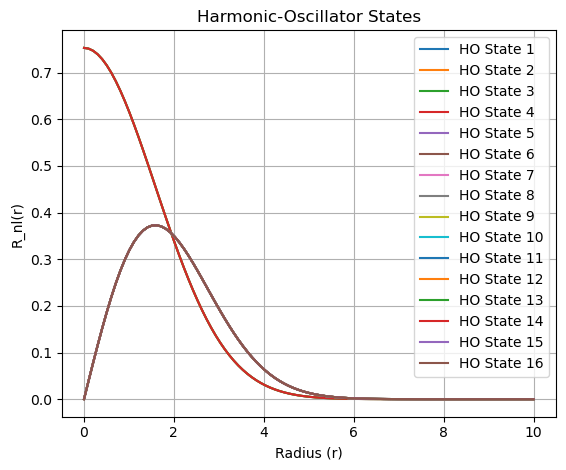

In [17]:
#Find the harmonic oscillator states
import matplotlib.pyplot as plt
r = np.linspace(0, 10, 100)
hostates=np.zeros((A, len(r)))
for i in range(A):
    hostates[i]=R_nl(n_val[i], l_val[i], r)

for i in range(A):
    plt.plot(r, hostates[i], label=f"HO State {i+1}")

plt.xlabel("Radius (r)")
plt.ylabel("R_nl(r)")
plt.title("Harmonic-Oscillator States")
plt.legend(loc='upper right', bbox_to_anchor=(1, 1))
plt.grid()
plt.tight_layout(rect=[0, 0, 0.90, 1])
plt.show()

Single-particle energies:
   0  7.3875
   1  7.8969
   2  8.4138
   3  8.9232
   4  32.9224
   5  33.1107
   6  33.2427
   7  33.4311
   8  36.7319
   9  37.0299
  10  37.8454
  11  38.1434
  12  45.3250
  13  45.3250
  14  45.3250
  15  45.3250
Binding Energy: 30.6815 MeV


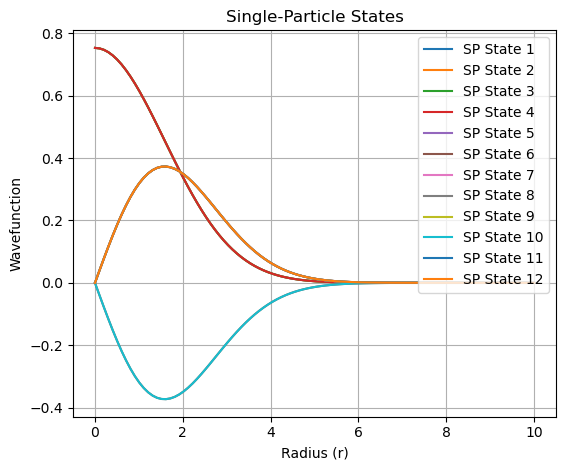

In [18]:
new_energies, C, BE = hartree_fock_solver(c_hoenergy, optimized_me2b, orbitals, 12)
print("Single-particle energies:")
for i in range(orbitals):
    print(f"{i:4d}  {new_energies[i]:.4f}")
print(f"Binding Energy: {BE:.4f} MeV")

#Find the single particle states
spstates=np.zeros((12, len(r)))
for i in range(12):
    for gamma in range(orbitals):
        spstates[i]+=C[gamma][i]*R_nl(n_val[gamma], l_val[gamma], r)

for i in range(12):
    plt.plot(r, spstates[i], label=f"SP State {i+1}")

plt.xlabel("Radius (r)")
plt.ylabel("Wavefunction")
plt.title("Single-Particle States")
plt.legend(loc='upper right', bbox_to_anchor=(1, 1))
plt.grid()
plt.tight_layout(rect=[0, 0, 0.90, 1])

plt.show()